In [2]:
import networkx as nx
from networkx.readwrite import json_graph
import json

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import itertools
import numpy as np
G = nx.Graph()

In [6]:
with open('country_similarities_large.json', 'r') as file:
    data = json.load(file)

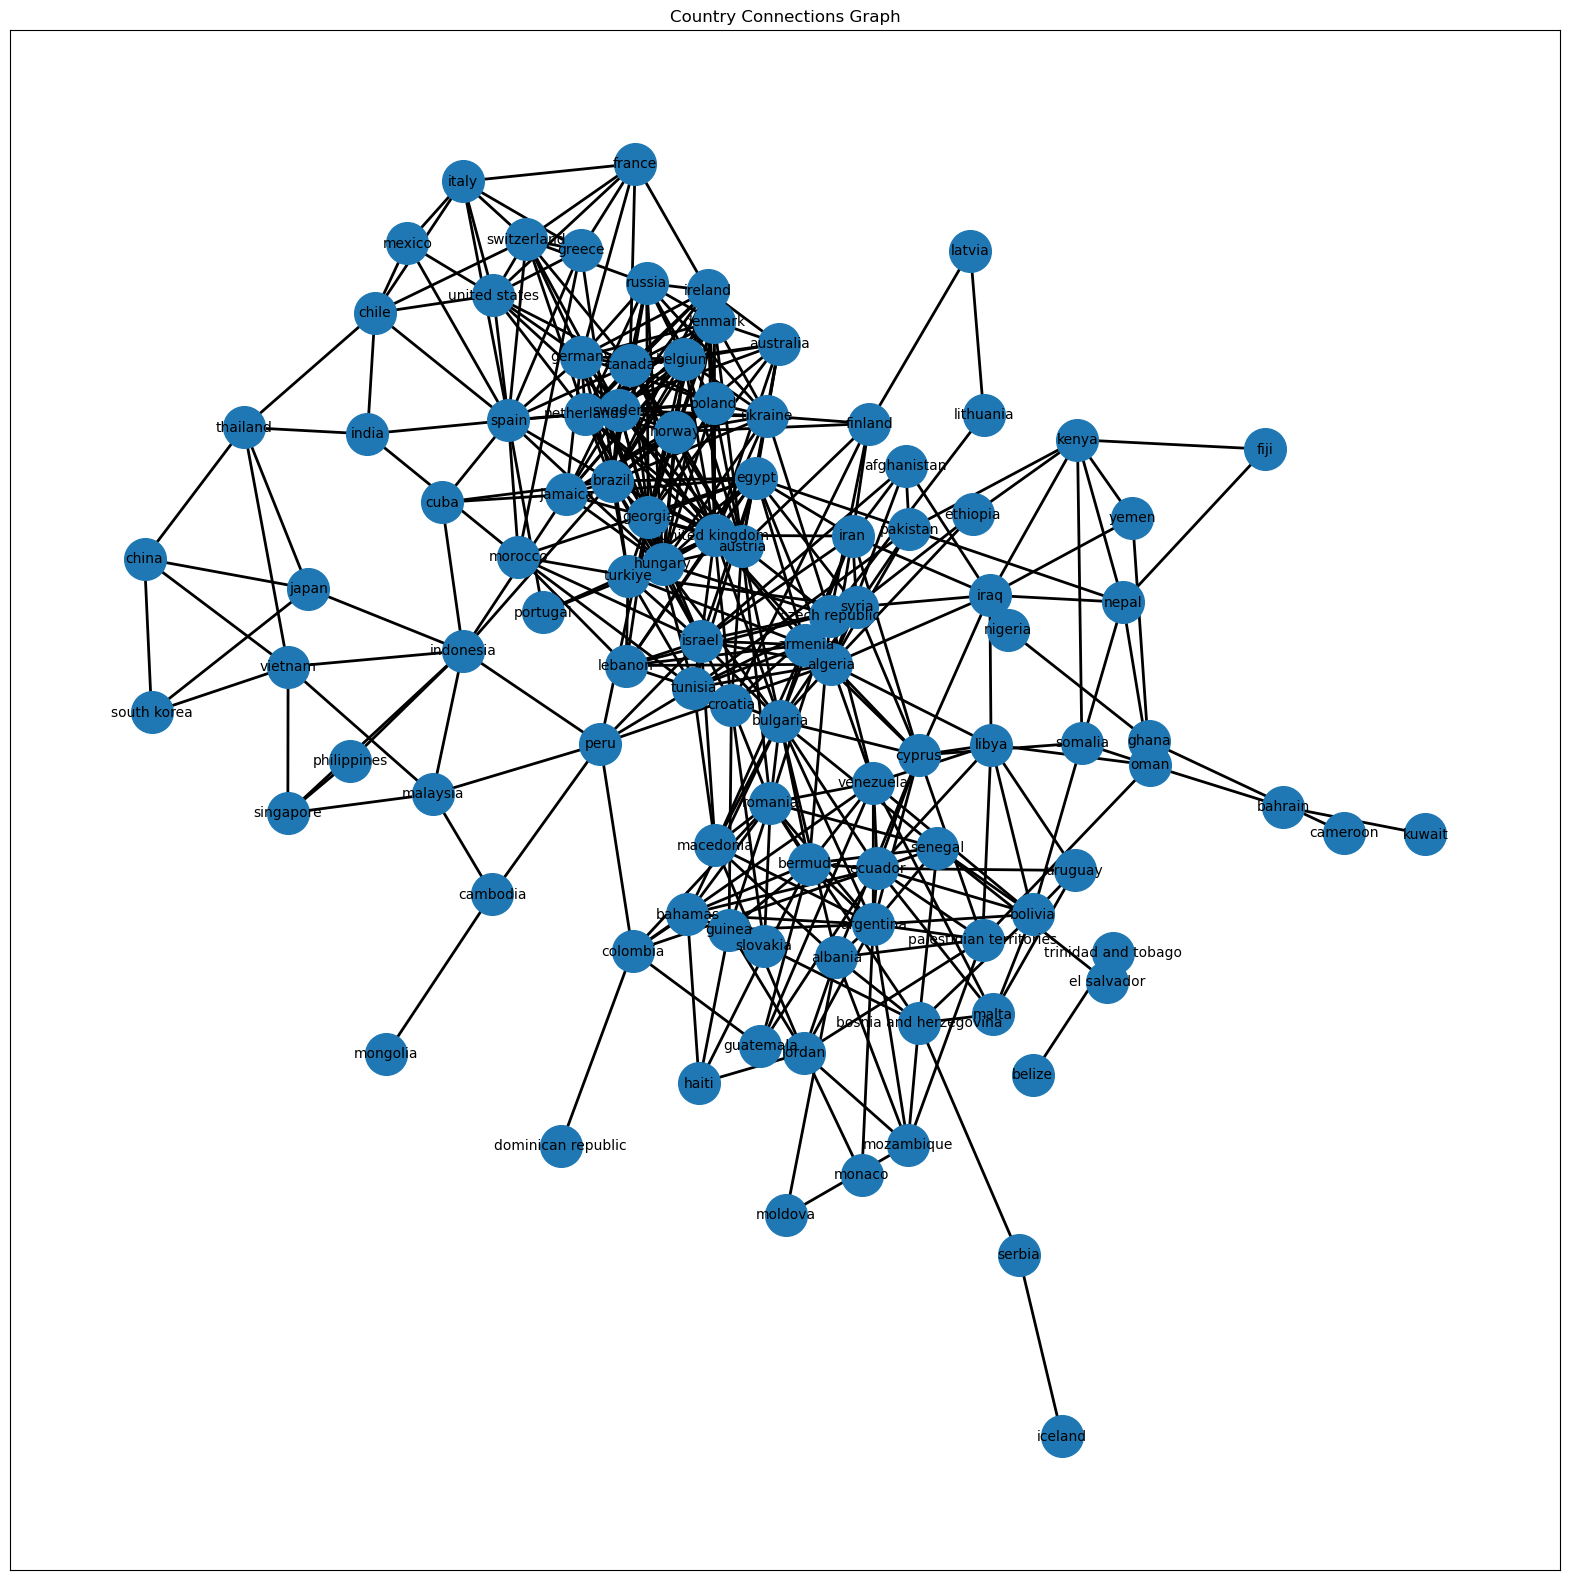

In [15]:
# Add nodes and edges
for country, connections in data.items():
    for conn_country, weight in connections:
        weight = round(weight, 2)
        G.add_edge(country, conn_country, weight=weight)

# Draw the graph with a larger figure size
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
#pos = nx.spring_layout(G, k=0.5)  # Adjust the spring layout parameter
pos = nx.kamada_kawai_layout(G)
# Nodes
nx.draw_networkx_nodes(G, pos, node_size=900)

# Edges
nx.draw_networkx_edges(G, pos, width=2)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Edge weights
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Save the plot as a PNG file 
plt.savefig("country_connections_graph_2.png")

plt.title("Country Connections Graph")
plt.show()

## Clustering the different countries

In [4]:
#edge_list = []
#known_tuples = []
#for country_1 in country_keys:
#    country_edges = data[country_1] ## List of countries
#    for country_2 in country_edges:
        
#        tuple_1 = (country_1, country_2)
#        tuple_2 = (country_2, country_1)
#        if tuple_1 not in known_tuples or tuple_2 not in known_tuples:
#            edge_list.append((country_1, country_2, 1))
#            known_tuples.append(tuple_1)
#            known_tuples.append(tuple_2)
        

In [8]:
#G = nx.Graph()
#G.add_weighted_edges_from(edge_list)

In [ ]:
#nx.community.edge_betweenness_partition(G, 20)

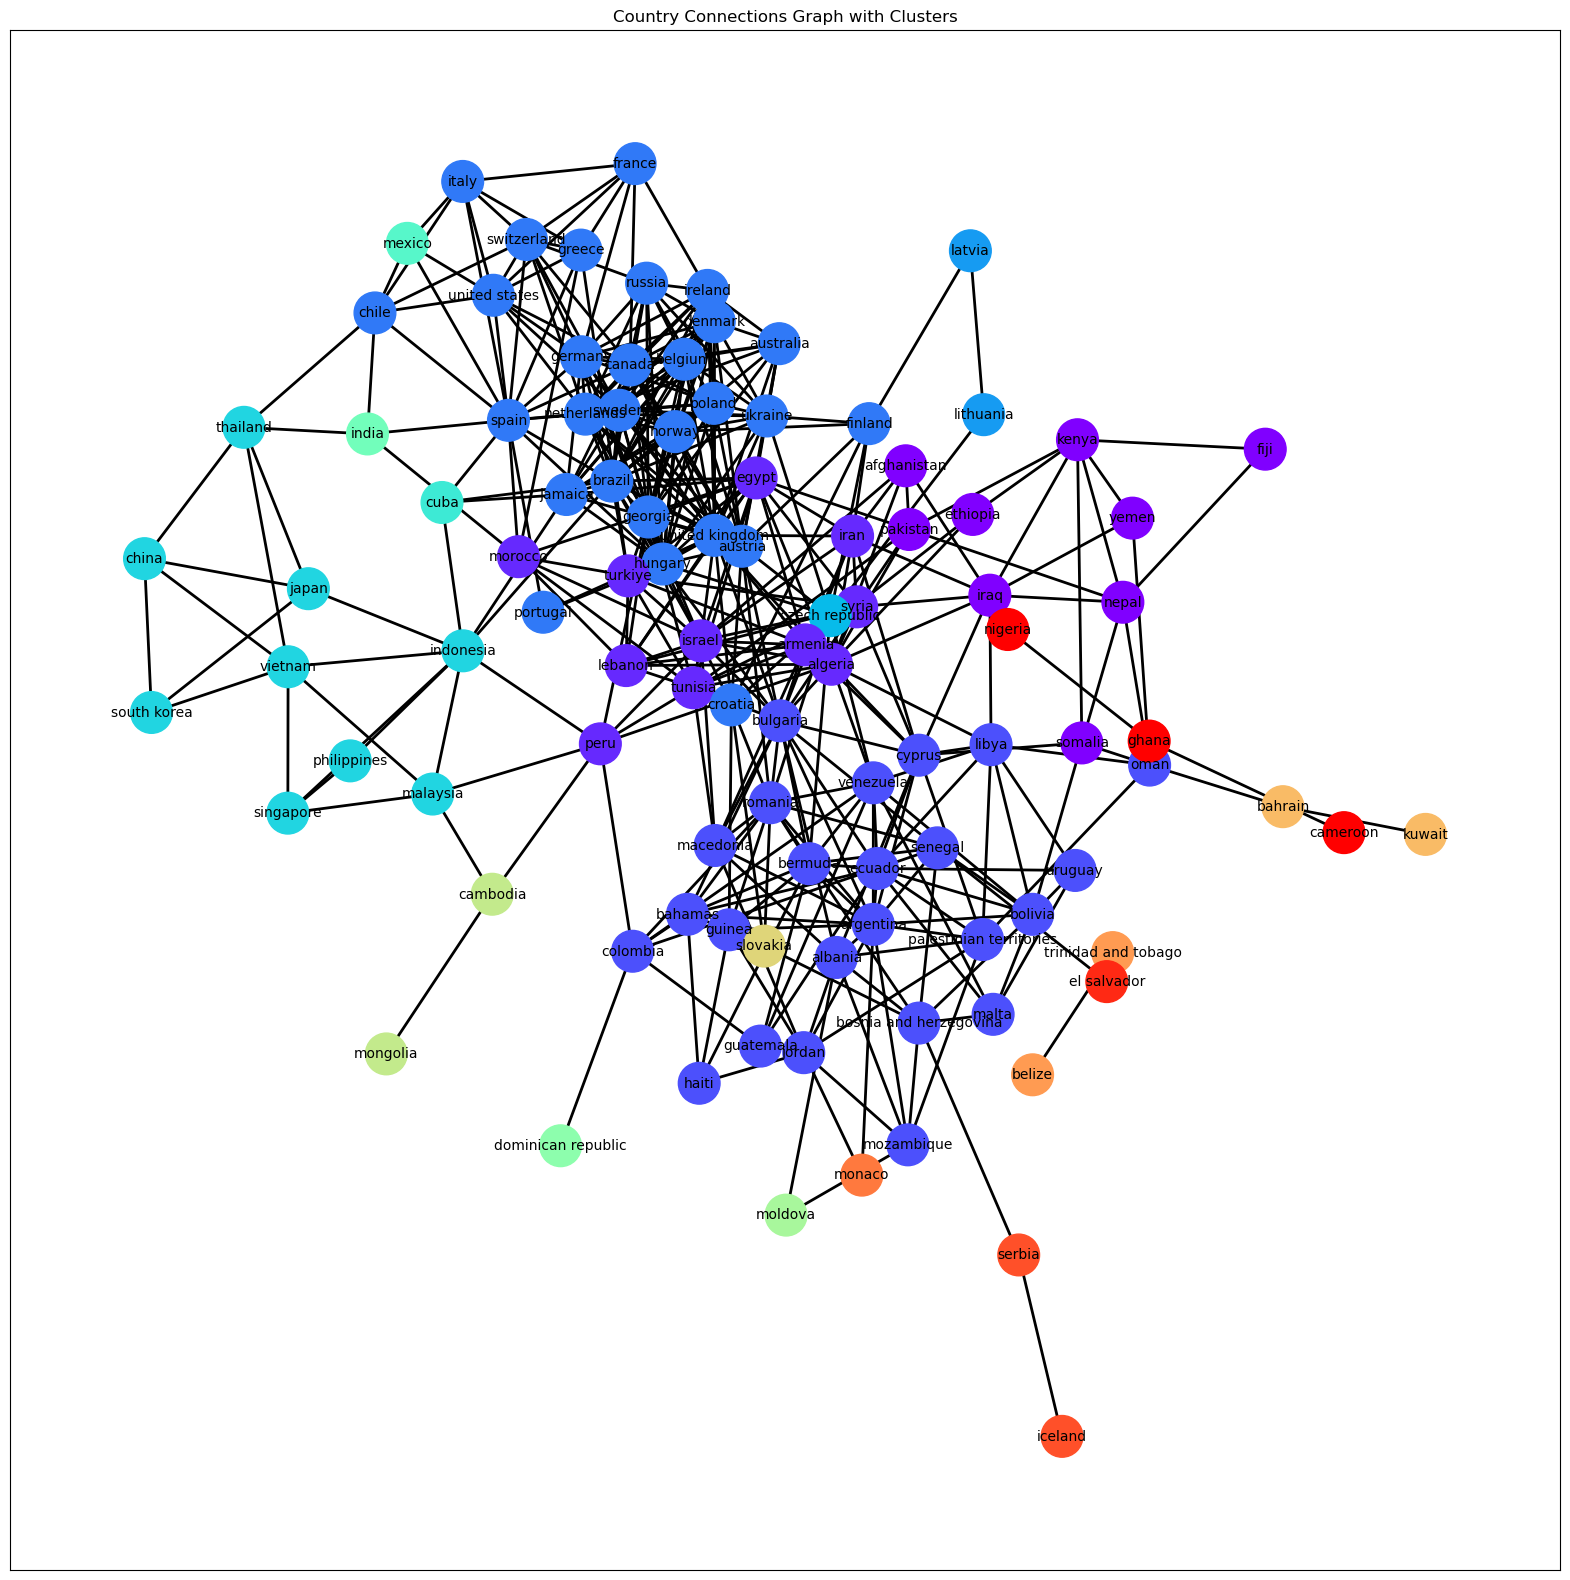

In [17]:
# Create a graph
G = nx.Graph()

# Add nodes and edges
for country, connections in data.items():
    for conn_country, weight in connections:
        weight = round(weight, 2)
        G.add_edge(country, conn_country, weight=weight)

# Use Girvan-Newman algorithm for community detection
comp = girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= 20, comp)
clusters = list(limited)[-1]

# Create a color map
color_map = {}
colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))

for i, cluster in enumerate(clusters):
    for node in cluster:
        color_map[node] = colors[i]

# Draw the graph with a larger figure size
plt.figure(figsize=(20, 20))
#pos = nx.spring_layout(G, k=0.3)
pos = nx.kamada_kawai_layout(G)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=900, node_color=[color_map[node] for node in G.nodes()])

# Edges
nx.draw_networkx_edges(G, pos, width=2)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Edge weights
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Country Connections Graph with Clusters")
plt.savefig("country_connections_cluters.png")
plt.show()

In [ ]:
# Use Girvan-Newman algorithm for community detection
#comp = girvan_newman(G)
#limited = itertools.takewhile(lambda c: len(c) <= 20, comp)
#clusters = list(limited)[-1]

# Convert the clusters to a list
cluster_list = [list(cluster) for cluster in clusters]

# Print the clusters
for idx, cluster in enumerate(cluster_list):
    print(f"Cluster {idx+1}: {cluster}")

# Save clusters to a text file
with open('Country_clusters.txt', 'w') as f:
    for idx, cluster in enumerate(cluster_list):
        f.write(f"Cluster {idx+1}: {cluster}\n")

#print("Clusters saved to clusters.txt")